### Day3 work
- datasets: auto-mpg.csv
- goal: predict mpg
- learning method: supervised learning, regression
- learning algorithm: (multi) linearregression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = '../../EX_PANDAS06/data/auto_mpg.csv'

data_df = pd.read_csv(path)

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
data_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [10]:
# 단위 변환 표준화 mpg ==> kpl
data_df['kpl'] = data_df['mpg'] * 0.425144
data_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,7.652592
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,6.377160
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,7.652592
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,6.802304
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,7.227448
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,11.478888
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,18.706336
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,13.604608
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,11.904032


In [9]:
data_df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [12]:
# ? 데이터 확인 하기
idx = data_df[data_df['horsepower'] == '?'].index
data_df.loc[idx]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto,10.628600
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick,8.928024
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe,17.388390
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra,10.033398
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i,14.667468
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl,9.778312


In [13]:
# ? 데이터는 버리는 걸로.. 결정

data_df['horsepower'] = data_df['horsepower'].replace('?', pd.NA)
data_df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
kpl             0
dtype: int64

In [16]:
data_df = data_df.dropna()
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
 9   kpl           392 non-null    float64
dtypes: float64(4), int64(4), object(2)
memory usage: 33.7+ KB


In [17]:
data_df = data_df.reset_index(drop=True)

In [18]:
data_df['horsepower'] = data_df['horsepower'].astype('int64')

In [19]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
 9   kpl           392 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 30.8+ KB


In [21]:
# use data columns
kpl_df = data_df.drop(columns=['mpg', 'car name', 'origin'])
kpl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     392 non-null    int64  
 1   displacement  392 non-null    float64
 2   horsepower    392 non-null    int64  
 3   weight        392 non-null    int64  
 4   acceleration  392 non-null    float64
 5   model year    392 non-null    int64  
 6   kpl           392 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 21.6 KB


In [22]:
# corr feautre
kpl_df.corr()

,cylinders,displacement,horsepower,weight,acceleration,model year,kpl
cylinders,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.777618
displacement,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.805127
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.778427
weight,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.832244
acceleration,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.423329
model year,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.580541
kpl,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,1.000000


In [24]:
corr = kpl_df.corr()

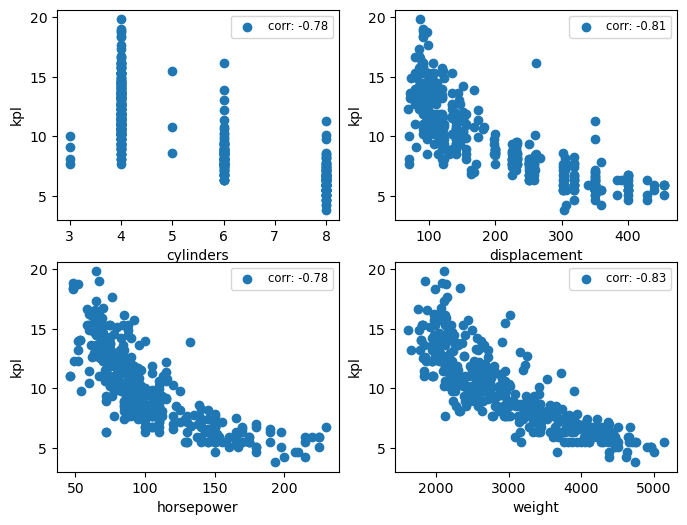

In [29]:
# show corr
fig = plt.figure(figsize=(8, 6))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.scatter(kpl_df['cylinders'], kpl_df['kpl'], label=f"corr: {corr.loc['cylinders', 'kpl']:.2f}")
ax1.set_xlabel('cylinders')
ax1.set_ylabel('kpl')
ax1.legend(fontsize='small')

ax2.scatter(kpl_df['displacement'], kpl_df['kpl'], label=f"corr: {corr.loc['displacement', 'kpl']:.2f}")
ax2.set_xlabel('displacement')
ax2.set_ylabel('kpl')
ax2.legend(fontsize='small')

ax3.scatter(kpl_df['horsepower'], kpl_df['kpl'], label=f"corr: {corr.loc['horsepower', 'kpl']:.2f}")
ax3.set_xlabel('horsepower')
ax3.set_ylabel('kpl')
ax3.legend(fontsize='small')

ax4.scatter(kpl_df['weight'], kpl_df['kpl'], label=f"corr: {corr.loc['weight', 'kpl']:.2f}")
ax4.set_xlabel('weight')
ax4.set_ylabel('kpl')
ax4.legend(fontsize='small')

plt.show()

### Data split

In [39]:
# feature & label

feature = kpl_df[['cylinders', 'displacement', 'horsepower', 'weight']]
label = kpl_df['kpl']


In [40]:
print(f"feature: {feature.shape}, {feature.ndim}D")
print(f"label: {label.shape}, {label.ndim}D")

feature: (392, 4), 2D
label: (392,), 1D


In [41]:
# train & test split
from sklearn.model_selection import train_test_split

In [42]:
# train:test = 7:3
# random state = 38
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.3, random_state=38)

In [43]:
print(f"X_train: {X_train.shape}, {X_train.ndim}D")
print(f"y_tarin: {y_train.shape}, {y_train.ndim}D")
print()
print(f"X_test: {X_test.shape}, {X_test.ndim}D")
print(f"y_test: {y_test.shape}, {y_test.ndim}D")

X_train: (274, 4), 2D
y_tarin: (274,), 1D

X_test: (118, 4), 2D
y_test: (118,), 1D


In [44]:
print('X_train ratio: ', len(X_train)/len(kpl_df))
print('X_test ratio: ', len(X_test)/len(kpl_df))

X_train ratio:  0.6989795918367347
X_test ratio:  0.3010204081632653


### Non Scaling

In [45]:
# non scaling model
from sklearn.linear_model import LinearRegression

In [46]:
non_model = LinearRegression()

In [47]:
# learning model
non_model.fit(X_train, y_train)

LinearRegression()

In [48]:
# after learning
non_weight = non_model.coef_
non_bais = non_model.intercept_

print(f"model.coef_: {len(non_weight)}개, {non_weight}")
print(f"model.intercept_: {non_bais}")

model.coef_: 4개, [-0.19123664 -0.00179403 -0.01710976 -0.00193147]
model.intercept_: 18.920902877615312


In [51]:
# score
non_score = non_model.score(X_test, y_test)
print(f"score: {non_score}")

score: 0.7533174804243589


In [52]:
# performace index
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [53]:
non_pred_score = non_model.predict(X_test)

non_mae = mean_absolute_error(y_test, non_pred_score)
non_mse = mean_squared_error(y_test,non_pred_score)
non_rmse = mean_squared_error(y_test, non_pred_score, squared=False)
non_r2 = r2_score(y_test, non_pred_score)

In [54]:
print(f"mae: {non_mae}")
print(f"mse: {non_mse}")
print(f"rmse: {non_rmse}")
print(f"r2 score: {non_r2}")

mae: 1.2696617894289375
mse: 2.730531423878764
rmse: 1.652431972541915
r2 score: 0.7533174804243589


### MinMaxScaling

In [55]:
# minmaxscaling
from sklearn.preprocessing import MinMaxScaler

In [56]:
mmscaler = MinMaxScaler()

In [57]:
mmscaler.fit(X_train, y_train)

MinMaxScaler()

In [59]:
mmscaler.min_, mmscaler.scale_, mmscaler.data_min_, mmscaler.data_max_

(array([-0.6       , -0.17571059, -0.25      , -0.45732917]),
 array([0.2       , 0.00258398, 0.00543478, 0.00028353]),
 array([   3.,   68.,   46., 1613.]),
 array([   8.,  455.,  230., 5140.]))

In [60]:
mmscaled_X_train = mmscaler.transform(X_train)
mmscaled_X_test = mmscaler.transform(X_test)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [62]:
print(f"X_train_scaled: {mmscaled_X_train.shape}, {mmscaled_X_train.ndim}D")
print(f"y_train: {y_train.shape}, {y_train.ndim}D")

X_train_scaled: (274, 4), 2D
y_train: (274,), 1D


In [63]:
mm_model = LinearRegression()
mm_model.fit(mmscaled_X_train, y_train)

LinearRegression()

In [64]:
# after learning
mm_weight = mm_model.coef_
mm_bais = mm_model.intercept_

print(f"model.coef_: {len(mm_weight)}개, {mm_weight}")
print(f"model.intercept_: {mm_bais}")

model.coef_: 4개, [-0.95618319 -0.69428803 -3.14819504 -6.81229153]
model.intercept_: 14.322690776257208


In [66]:
# score
mm_score = mm_model.score(mmscaled_X_test, y_test)
print(f"score: {mm_score}")

score: 0.7533174804243589


In [67]:
# performace index
mm_pred_score = mm_model.predict(mmscaled_X_test)

mm_mae = mean_absolute_error(y_test, mm_pred_score)
mm_mse = mean_squared_error(y_test,mm_pred_score)
mm_rmse = mean_squared_error(y_test, mm_pred_score, squared=False)
mm_r2 = r2_score(y_test, mm_pred_score)

print(f"mae: {mm_mae}")
print(f"mse: {mm_mse}")
print(f"rmse: {mm_rmse}")
print(f"r2 score: {mm_r2}")

mae: 1.2696617894289381
mse: 2.730531423878764
rmse: 1.652431972541915
r2 score: 0.7533174804243589


### StadardScaling

In [69]:
from sklearn.preprocessing import StandardScaler

In [71]:
sdscaler = StandardScaler()

In [72]:
sdscaler.fit(X_train, y_train)

StandardScaler()

In [77]:
sdscaler.scale_, sdscaler.mean_, sdscaler.var_

(array([  1.7111924 , 105.42954189,  38.56583003, 858.84849219]),
 array([   5.47445255,  195.88138686,  104.58394161, 2991.89051095]),
 array([2.92817944e+00, 1.11153883e+04, 1.48732325e+03, 7.37620733e+05]))

In [81]:
sdscaled_X_train = sdscaler.transform(X_train)
sdscaled_X_test = sdscaler.transform(X_test)

print(f"X_train_scaled: {sdscaled_X_train.shape}, {sdscaled_X_train.ndim}D")
print(f"y_train: {y_train.shape}, {y_train.ndim}D")

X_train_scaled: (274, 4), 2D
y_train: (274,), 1D


In [79]:
sd_model = LinearRegression()
sd_model.fit(sdscaled_X_train, y_train)

LinearRegression()

In [80]:
# after learning
sd_weight = sd_model.coef_
sd_bais = sd_model.intercept_

print(f"model.coef_: {len(sd_weight)}개, {sd_weight}")
print(f"model.intercept_: {sd_bais}")

model.coef_: 4개, [-0.32724268 -0.18914333 -0.65985193 -1.65883933]
model.intercept_: 9.95442091970803


In [82]:
# score
sd_score = sd_model.score(sdscaled_X_test, y_test)
print(f"score: {sd_score}")

score: 0.753317480424359


In [96]:
# performace index
sd_pred_score = sd_model.predict(sdscaled_X_test)

sd_mae = mean_absolute_error(y_test, sd_pred_score)
sd_mse = mean_squared_error(y_test,sd_pred_score)
sd_rmse = mean_squared_error(y_test, sd_pred_score, squared=False)
sd_r2 = r2_score(y_test, sd_pred_score)

print(f"mae: {sd_mae}")
print(f"mse: {sd_mse}")
print(f"rmse: {sd_rmse}")
print(f"r2 score: {sd_r2}")

mae: 1.2696617894289381
mse: 2.7305314238787637
rmse: 1.6524319725419148
r2 score: 0.753317480424359


### RobustScaling

In [84]:
from sklearn.preprocessing import RobustScaler

In [87]:
rbscaler = RobustScaler()

In [88]:
rbscaler.fit(X_train, y_train)

RobustScaler()

In [89]:
rbscaler.center_, rbscaler.scale_

(array([   4. ,  151. ,   93.5, 2822.5]),
 array([   4. ,  195. ,   55. , 1400.5]))

In [90]:
rbscaled_X_train = rbscaler.transform(X_train)
rbscaled_X_test = rbscaler.transform(X_test)

print(f"X_train_scaled: {rbscaled_X_train.shape}, {rbscaled_X_train.ndim}D")
print(f"y_train: {y_train.shape}, {y_train.ndim}D")

X_train_scaled: (274, 4), 2D
y_train: (274,), 1D


In [91]:
rb_model = LinearRegression()
rb_model.fit(rbscaled_X_train, y_train)

LinearRegression()

In [92]:
# after learning
rb_weight = rb_model.coef_
rb_bais = rb_model.intercept_

print(f"model.coef_: {len(rb_weight)}개, {rb_weight}")
print(f"model.intercept_: {rb_bais}")

model.coef_: 4개, [-0.76494655 -0.34983506 -0.94103656 -2.70502248]
model.intercept_: 10.83372471169612


In [93]:
# score
rb_score = rb_model.score(rbscaled_X_test, y_test)
print(f"score: {rb_score}")

score: 0.7533174804243589


In [95]:
# performace index
rb_pred_score = rb_model.predict(rbscaled_X_test)

rb_mae = mean_absolute_error(y_test, rb_pred_score)
rb_mse = mean_squared_error(y_test,rb_pred_score)
rb_rmse = mean_squared_error(y_test, rb_pred_score, squared=False)
rb_r2 = r2_score(y_test, rb_pred_score)

print(f"mae: {rb_mae}")
print(f"mse: {rb_mse}")
print(f"rmse: {rb_rmse}")
print(f"r2 score: {rb_r2}")

mae: 1.2696617894289381
mse: 2.730531423878764
rmse: 1.652431972541915
r2 score: 0.7533174804243589


### 최종 비교

In [102]:
print('Weight')
print(f"Non Scaling weight: {non_weight}")
print(f"MinMax Scalging weight: {mm_weight}")
print(f"Standrad Scaling weight: {sd_weight}")
print(f"Robust Scaling weight: {rb_weight}")
print('\n\n')

print('Bais')
print(f"Non scaling bais: {non_bais:.2f}")
print(f"MinMax Scaling bais: {mm_bais:.2f}")
print(f"Standrad Scaling bais: {sd_bais:.2f}")
print(f"Robust Scaling bais: {rb_bais:.2f}")
print('\n\n')

print('R2 score (%)')
print(f"Non scaling R2 score: {non_r2*100:.2f}")
print(f"MinMax Scalging R2 score: {mm_r2*100:.2f}")
print(f"Standrad Scaling R2 score: {sd_r2*100:.2f}")
print(f"Robust Scaling R2 score: {rb_r2*100:.2f}")

Weight
Non Scaling weight: [-0.19123664 -0.00179403 -0.01710976 -0.00193147]
MinMax Scalging weight: [-0.95618319 -0.69428803 -3.14819504 -6.81229153]
Standrad Scaling weight: [-0.32724268 -0.18914333 -0.65985193 -1.65883933]
Robust Scaling weight: [-0.76494655 -0.34983506 -0.94103656 -2.70502248]



Bais
Non scaling bais: 18.92
MinMax Scaling bais: 14.32
Standrad Scaling bais: 9.95
Robust Scaling bais: 10.83



R2 score (%)
Non scaling R2 score: 75.33
MinMax Scalging R2 score: 75.33
Standrad Scaling R2 score: 75.33
Robust Scaling R2 score: 75.33


결과를 보아하니 Scaling의 여부는 큰 차이가 없는 듯.
- feature : cylinders, displacement, horsepower, weight
- label: kpl
- train : test = 7 : 3
- random_state = 38